Epoch 1/100
469/469 - 2s - loss: 0.0148 - accuracy: 0.9021 - val_loss: 0.0099 - val_accuracy: 0.9368 - 2s/epoch - 3ms/step
Epoch 2/100
469/469 - 1s - loss: 0.0088 - accuracy: 0.9431 - val_loss: 0.0083 - val_accuracy: 0.9468 - 1s/epoch - 3ms/step
Epoch 3/100
469/469 - 1s - loss: 0.0065 - accuracy: 0.9591 - val_loss: 0.0066 - val_accuracy: 0.9565 - 1s/epoch - 3ms/step
Epoch 4/100
469/469 - 1s - loss: 0.0051 - accuracy: 0.9682 - val_loss: 0.0052 - val_accuracy: 0.9669 - 1s/epoch - 3ms/step
Epoch 5/100
469/469 - 1s - loss: 0.0041 - accuracy: 0.9755 - val_loss: 0.0044 - val_accuracy: 0.9712 - 1s/epoch - 3ms/step
Epoch 6/100
469/469 - 1s - loss: 0.0034 - accuracy: 0.9800 - val_loss: 0.0042 - val_accuracy: 0.9730 - 1s/epoch - 3ms/step
Epoch 7/100
469/469 - 1s - loss: 0.0028 - accuracy: 0.9832 - val_loss: 0.0039 - val_accuracy: 0.9750 - 1s/epoch - 3ms/step
Epoch 8/100
469/469 - 1s - loss: 0.0024 - accuracy: 0.9859 - val_loss: 0.0037 - val_accuracy: 0.9767 - 1s/epoch - 3ms/step
Epoch 9/100
469/

KeyboardInterrupt: 

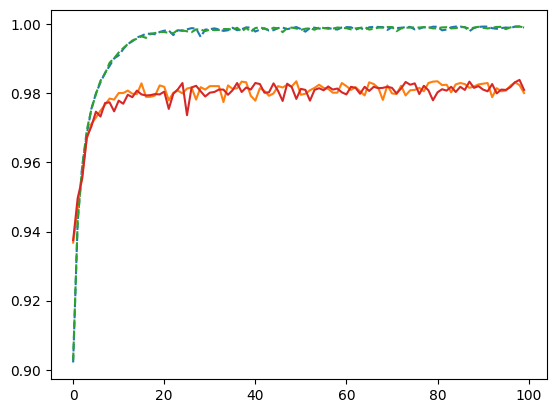

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)


learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001] 

for lr in learning_rates: 
    mlp_adam=Sequential()
    mlp_adam.add(Dense(units=512,activation='tanh',input_shape=(784,)))
    mlp_adam.add(Dense(units=10,activation='softmax'))

    mlp_adam.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
    hist_adam=mlp_adam.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)
    print('학습률 {} 일때, Adam 정확률 :{}%'.format(lr, mlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100))
    
    plt.plot(hist_adam.history['accuracy'],'--', label ="Adam lr={}".format(lr))
    plt.plot(hist_adam.history['val_accuracy'],label ="Adam val lr={}".format(lr))


plt.title('Comparison of Adam optimizers')
plt.ylim((0.7,1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()